In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn import metrics
import xgboost as xgb
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [582]:
def model(classifier_name, X, y):
    print(classifier_name)
    print('data shape:{0}'.format(X.shape))
#     classifier = RandomForestClassifier(n_estimators=400)
    classifier = xgb.XGBClassifier(silent=True,
                      scale_pos_weight=1,
                      learning_rate=0.01,
                      colsample_bytree = 0.4,
                      subsample = 0.5,
                      objective='binary:logistic',
                      n_estimators=200,
                      reg_alpha = 0.5,
                      max_depth=6,
                      gamma=10)
    X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    # print('X_train shape:{0}'.format(X_train.shape))
    # print('x_test shape:{0}'.format(x_test.shape))
    # print('y_train shape:{0}'.format(y_train.shape))
    # print('y_test shape:{0}'.format(y_test.shape))

    classifier.fit(X_train, y_train)
    y_predict = classifier.predict(x_test)
    y_predict_proba = classifier.predict_proba(x_test)
    # metrics.plot_roc_curve(estimator=classifier,X=x_test,y=y_test)
    precision = metrics.precision_score(y_test, y_pred=y_predict, average='macro')
    accuracy = metrics.accuracy_score(y_true=y_test,y_pred=y_predict)
    print('precision:{0}'.format(precision))
    print('accracy:{0}'.format(accuracy))
    return classifier


In [730]:

train_path = 'train.csv'
test_path = 'test.csv'
df = pd.read_csv(train_path,sep=',')
df['Age'].fillna(0,inplace=True)
df['Fare'].fillna(0,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [731]:
column = 'Embarked'
df[column].fillna('unknow',inplace=True)
d = Counter(df[column])
laEm = LabelEncoder()
labels = [key for key,value in d.items()]
print(labels)
laEm.fit(labels)
datas = laEm.transform(df[column])
df[column] = datas

column = 'Sex'
df[column].fillna('unknow',inplace=True)
d = Counter(df[column])
laSex = LabelEncoder()
labels = [key for key,value in d.items()]
print(labels)
laSex.fit(labels)
datas = laSex.transform(df[column])
df[column] = datas

column = 'Cabin'
df[column].fillna('unknow',inplace=True)
d = Counter(df[column])
laSex = LabelEncoder()
labels = [key for key,value in d.items()]
print(labels)
laSex.fit(labels)
datas = laSex.transform(df[column])
df[column] = datas


['S', 'C', 'Q', 'unknow']
['male', 'female']
['unknow', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30

In [732]:
# robs = RobustScaler()
# age = robs.fit_transform(df['Age'].values.reshape(-1,1))
# fare = robs.fit_transform(df['Fare'].values.reshape(-1,1))
# df.drop('Age',axis=1,inplace=True)
# df.drop('Fare',axis=1,inplace=True)
# df.insert(0,'Age',age)
# df.insert(1,'Fare',fare)
# df.head()

df.head()
print(df.shape)

(891, 12)


In [735]:
fare_data = df['Fare']
q25,q75 = np.percentile(fare_data,25),np.percentile(fare_data,75)
print('q25',q25,'q75',q75)
iqr = q75 - q25
iqr_cut_off = iqr * 1.5
fare_down,fare_upper = q25 - iqr_cut_off,q75 + iqr_cut_off
outliers = [value for value in fare_data if value < fare_down or value > fare_upper]
print('length of outliers:{0}'.format(len(outliers)))
drop_index = df[(df['Fare'] > fare_upper) | (df['Fare'] < fare_down)].index
df.drop(drop_index,inplace=True)
print(df.shape)

q25 7.8958 q75 26.25
length of outliers:49
(750, 12)


Text(0.5, 1.0, 'Embarked vs Suvrived')

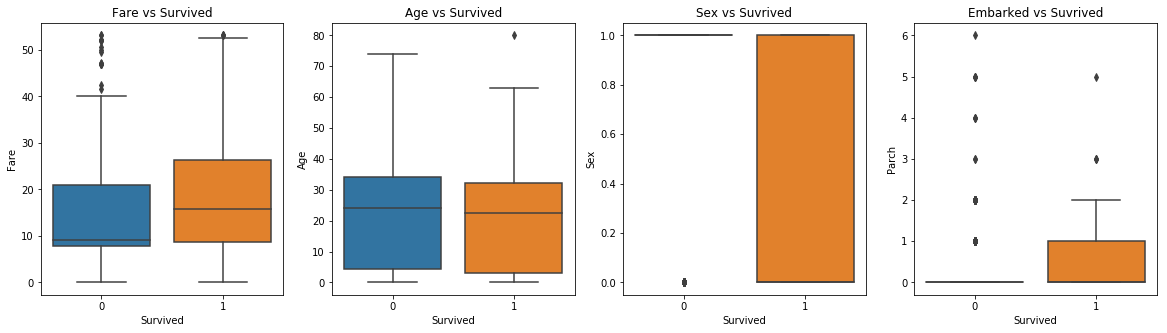

In [736]:
fig,axes = plt.subplots(ncols=4,figsize=(20,5))
sns.boxplot(x='Survived',y='Fare',data=df,ax=axes[0])
axes[0].set_title('Fare vs Survived')

sns.boxplot(x='Survived',y='Age',data=df,ax=axes[1])
axes[1].set_title('Age vs Survived')

sns.boxplot(x='Survived',y='Sex',data=df,ax=axes[2])
axes[2].set_title('Sex vs Suvrived')

sns.boxplot(x='Survived',y='Parch',data=df,ax=axes[3])
axes[3].set_title('Embarked vs Suvrived')


In [737]:
# X,y = df.loc[:,['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']],df['Survived']
need_columns = ['Pclass','Sex','SibSp','Parch','Fare','Cabin','Embarked']
X,y = df.loc[:,need_columns],df['Survived']
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,1,0,7.2500,147,2
2,3,0,0,0,7.9250,147,2
3,1,0,1,0,53.1000,55,2
4,3,1,0,0,8.0500,147,2
5,3,1,0,0,8.4583,147,1


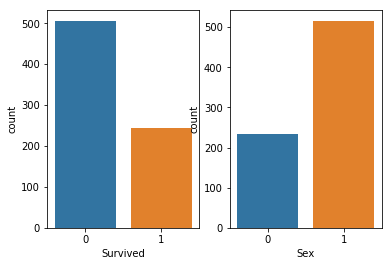

In [738]:
fig = plt.figure()
fig.add_subplot(121)
sns.countplot(y)
fig.add_subplot(122)
sns.countplot(df['Sex'])

In [753]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.001)
print('X_tain:',X_train.shape)
print('X_test:',X_test.shape)
#Evaluate performance of model using original data
classifier = model('baseline',X_train,y_train)

X_tain: (749, 7)
X_test: (1, 7)
baseline
data shape:(749, 7)
precision:0.8423076923076923
accracy:0.8


In [754]:
test= pd.read_csv(test_path,sep=',')
test['Age'].fillna(0,inplace=True)
test['Fare'].fillna(0,inplace=True)
test['Cabin'].fillna('A',inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,A,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,A,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,A,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,A,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,A,S


In [755]:
# X,y = df.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']],df['Survived']

df_test = test.loc[:,need_columns]

In [758]:
column = 'Embarked'
df_test[column].fillna('unknow',inplace=True)
d = Counter(df_test[column])
laEm = LabelEncoder()
labels = [key for key,value in d.items()]
print(labels)
laEm.fit(labels)
datas = laEm.transform(df_test[column])
df_test[column] = datas

column = 'Sex'
df_test[column].fillna('unknow',inplace=True)
d = Counter(df_test[column])
laSex = LabelEncoder()
labels = [key for key,value in d.items()]
print(labels)
laSex.fit(labels)
datas = laSex.transform(df_test[column])
df_test[column] = datas

column = 'Cabin'
df_test[column].fillna('unknow',inplace=True)
d = Counter(df_test[column])
laSex = LabelEncoder()
labels = [key for key,value in d.items()]
print(labels)
laSex.fit(labels)
datas = laSex.transform(df_test[column])
df_test[column] = datas


[1, 2, 0]
[1, 0]
[0, 13, 61, 16, 11, 3, 42, 56, 51, 6, 50, 31, 29, 72, 18, 36, 60, 26, 27, 22, 38, 20, 34, 25, 69, 4, 76, 39, 30, 35, 65, 37, 47, 53, 7, 75, 64, 67, 55, 17, 62, 40, 1, 8, 43, 74, 44, 57, 45, 52, 46, 70, 5, 48, 10, 28, 19, 32, 21, 71, 73, 2, 24, 14, 49, 68, 66, 63, 15, 33, 9, 54, 12, 41, 59, 58, 23]


In [759]:
y_pred = classifier.predict(df_test)
output = pd.DataFrame({'PassengerId':test['PassengerId'].values,'Survived':y_pred})
output.to_csv('submission.csv',sep=',',index=None)